# Customer_Churn_Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Replacing the Black values with Zero.
* As tenure is Zero no charges are recorded.

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",0).astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df['customerID'].duplicated().sum()

0

* Converted 0 and 1 values of senior citizen to Yes/No.

In [9]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)   

In [10]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


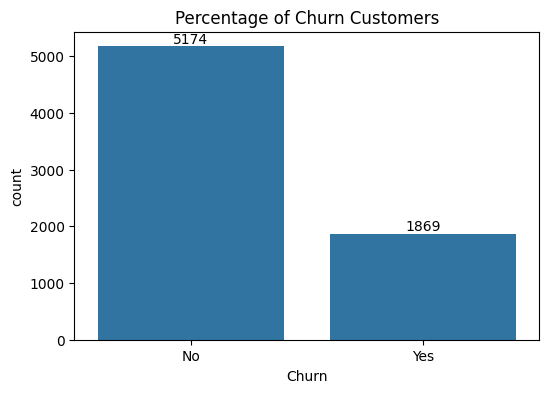

In [62]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, hue='Churn')
ax.bar_label(ax.containers[0])  
ax.bar_label(ax.containers[1])  
sns.countplot(x ='Churn',data = df)
plt.title('Percentage of Churn Customers')
plt.show()

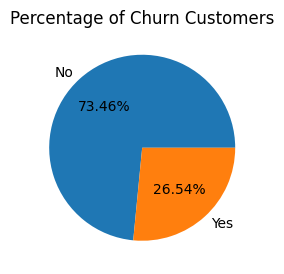

,Churn
Churn,
No,5174
Yes,1869


In [12]:
plt.figure(figsize=(3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels = gb.index, autopct='%1.2f%%')
plt.title('Percentage of Churn Customers')
plt.show()
gb

* From given pie chart we have conclude that 26.54% of our customer have churned out.

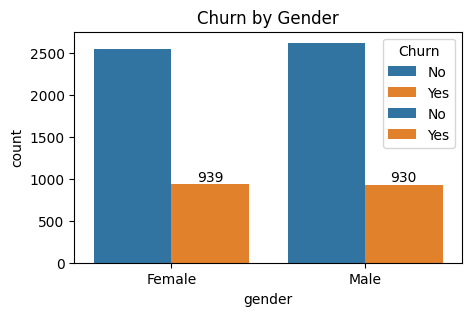

In [60]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='gender', data=df, hue='Churn')
ax.bar_label(ax.containers[1])  
sns.countplot(x = 'gender',data = df,hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

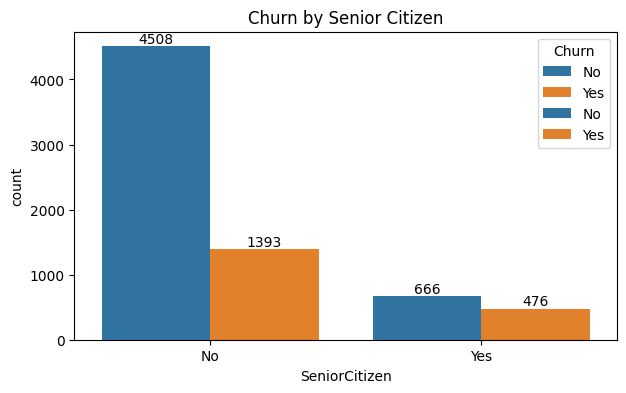

In [59]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')  # Assign plot to 'ax'
ax.bar_label(ax.containers[0])  # Add labels to bars
ax.bar_label(ax.containers[1])  
sns.countplot(x = 'SeniorCitizen',data = df,hue = 'Churn')
plt.title('Churn by Senior Citizen')
plt.show()

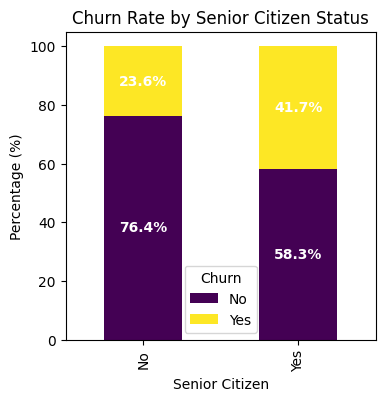

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
df_percent.plot(kind='bar', stacked=True, figsize=(4,4), colormap='viridis')

# Add percentage labels
for i, bars in enumerate(plt.gca().containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid labels on zero bars
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # X position
                bar.get_y() + height / 2,  # Y position
                f'{height:.1f}%',  # Format percentage
                ha='center', va='center', fontsize=10, color='white', fontweight='bold'
            )

# Labels & Title

plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.title("Churn Rate by Senior Citizen Status")
plt.legend(title="Churn")
plt.show()


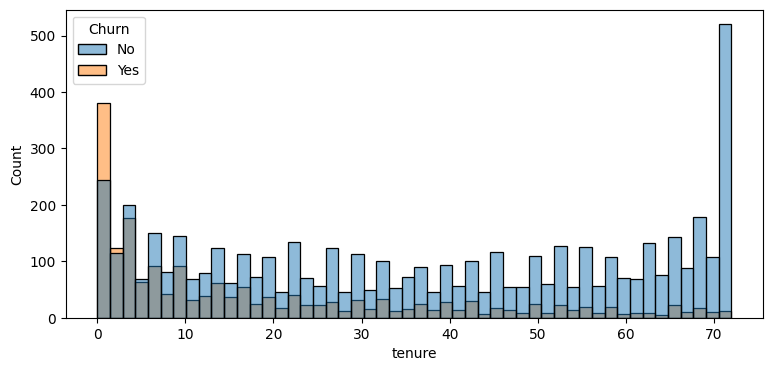

In [28]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data=df, bins=50, hue='Churn')
plt.show()

* People who have used the services for long time have stayed and people who have used our services for short time have churned.

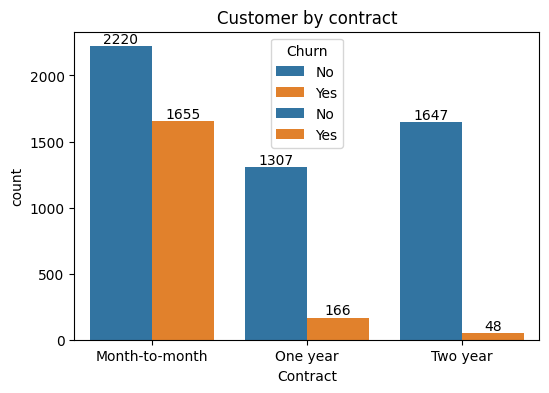

In [57]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Contract', data=df, hue='Churn')  # Assign plot to 'ax'
ax.bar_label(ax.containers[0])  # Add labels to bars
ax.bar_label(ax.containers[1])  
sns.countplot(x = 'Contract',data = df,hue = 'Churn')
plt.title("Customer by contract")
plt.show()

* People who have month to month contract are likely to churn than people with one or two year contract.

In [36]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

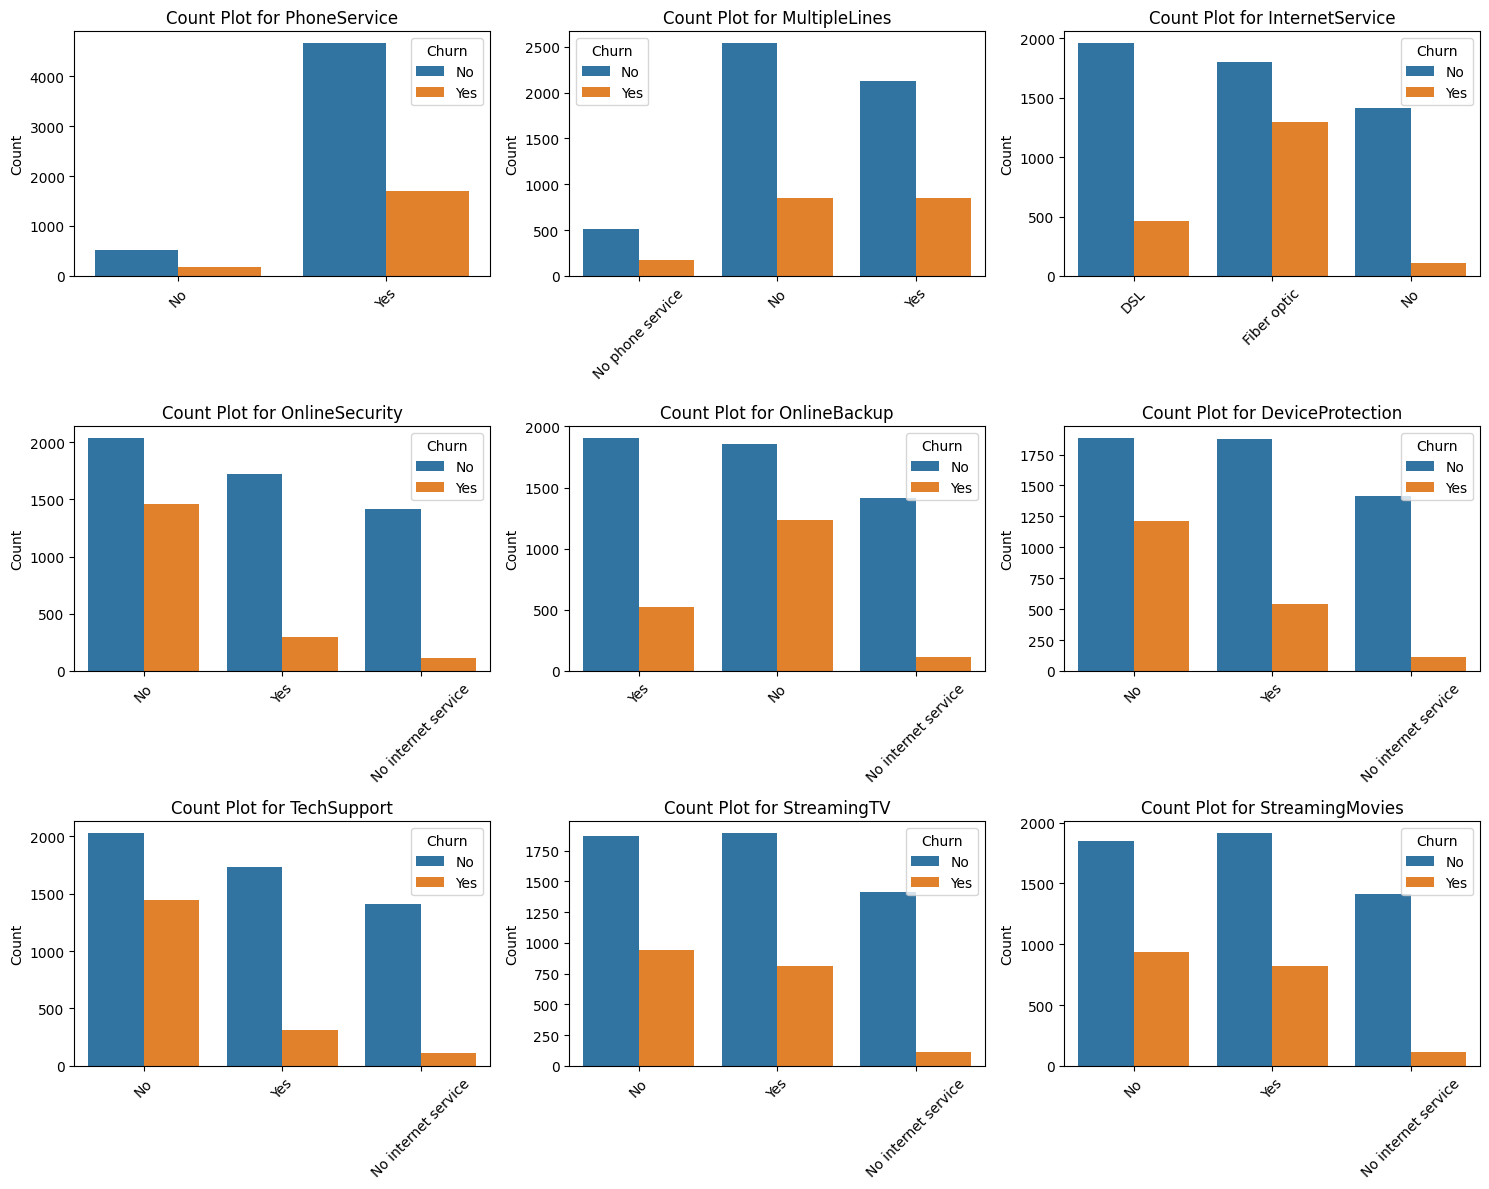

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of subplots
num_cols = len(columns)

# Create subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and plot countplots
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], hue=df['Churn'])  # Added hue=None to avoid warning
    axes[i].set_title(f"Count Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Adjust layout
plt.tight_layout()
plt.show()


* Customers with additional services like Online Security, Backup, Tech Support, and Device Protection tend to have lower churn.
* Customers with fiber optic internet and multiple lines have a higher likelihood of churn.
* Streaming services (TV & Movies) might be contributing to slightly higher churn.

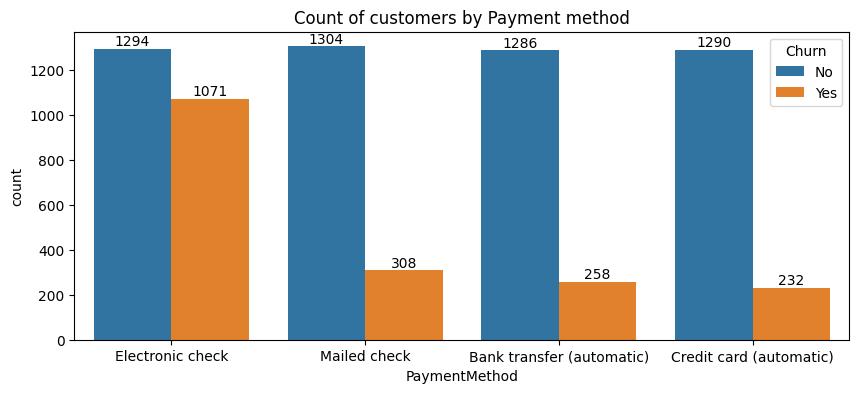

In [64]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn') 
ax.bar_label(ax.containers[0])  
ax.bar_label(ax.containers[1])  
plt.title("Count of customers by Payment method")
plt.show()


* Automatic payment methods (Bank Transfer & Credit Card) have the lowest churn.
* Customers using Electronic Checks are more likely to churn.
* Encouraging customers to switch to automatic payment methods may reduce churn.